<a href="https://colab.research.google.com/github/Diogc8/Samsung/blob/main/C%C3%B3pia_de_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Install and import category_encoders for better categorical encoding
!pip install category_encoders
import category_encoders as ce

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Import all the models we'll use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve,
    precision_recall_curve, average_precision_score
)
# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline


In [183]:
# Load training data
history = pd.read_csv('https://raw.githubusercontent.com/samsung-ai-course/8th-9th-edition/main/Supervised%20learning%20Hackathon%20-%20Edition%209/data/history.csv')
history.head()
history.shape

,id,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,37980,32.0,male,Associate,96865.0,10,MORTGAGE,7500.0,EDUCATION,6.04,0.08,10.0,601,No,0
1,9912,24.0,male,Associate,56838.0,6,RENT,9000.0,EDUCATION,11.49,0.16,4.0,647,Yes,0
2,43387,22.0,female,Master,37298.0,0,RENT,5000.0,MEDICAL,14.88,0.13,4.0,711,No,1
3,13823,23.0,female,Bachelor,39944.0,1,OWN,5000.0,VENTURE,13.99,0.13,3.0,597,Yes,0
4,44811,42.0,male,High School,67974.0,20,MORTGAGE,10000.0,HOMEIMPROVEMENT,15.41,0.15,11.0,586,No,1


(38250, 15)

In [184]:
# Load test data
test = pd.read_csv('https://raw.githubusercontent.com/samsung-ai-course/8th-9th-edition/main/Supervised%20learning%20Hackathon%20-%20Edition%209/data/test.csv')
test.head()
test.shape

,id,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,43299,22.0,female,Bachelor,56179.0,0,RENT,5000.0,EDUCATION,11.01,0.09,3.0,571,No
1,15156,23.0,male,Bachelor,151219.0,2,MORTGAGE,35000.0,EDUCATION,8.90,0.23,4.0,561,Yes
2,13780,23.0,female,Associate,115855.0,0,MORTGAGE,10000.0,EDUCATION,7.49,0.09,3.0,614,No
3,33636,39.0,female,High School,80392.0,16,RENT,13751.0,VENTURE,9.87,0.17,16.0,687,Yes
4,27044,29.0,male,High School,145057.0,3,OWN,7500.0,EDUCATION,7.74,0.05,8.0,682,Yes


(6750, 14)

In [185]:
# Load sample submission
sample_submission = pd.read_csv('https://raw.githubusercontent.com/samsung-ai-course/8th-9th-edition/main/Supervised%20learning%20Hackathon%20-%20Edition%209/data/sample_submission.csv')
sample_submission.head()
sample_submission.shape

,id,pred
0,43299,0
1,15156,1
2,13780,0
3,33636,0
4,27044,0


(6750, 2)

In [186]:
history.shape
history.describe()

(38250, 15)

,id,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,38250.000000,38250.000000,3.825000e+04,38250.000000,38250.000000,38250.000000,38250.000000,38250.000000,38250.000000,38250.000000
mean,22530.320549,27.765150,8.002838e+04,5.412288,9578.294928,11.000639,0.139770,5.869699,632.587712,0.221935
std,13000.063533,6.065495,7.672222e+04,6.082069,6310.595664,2.976424,0.087192,3.882926,50.416622,0.415553
min,1.000000,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,11277.250000,24.000000,4.714300e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,22528.500000,26.000000,6.701550e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,33807.750000,30.000000,9.578300e+04,8.000000,12131.750000,12.990000,0.190000,8.000000,669.000000,0.000000
max,45000.000000,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [187]:
history

,id,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,37980,32.0,male,Associate,96865.0,10,MORTGAGE,7500.0,EDUCATION,6.04,0.08,10.0,601,No,0
1,9912,24.0,male,Associate,56838.0,6,RENT,9000.0,EDUCATION,11.49,0.16,4.0,647,Yes,0
2,43387,22.0,female,Master,37298.0,0,RENT,5000.0,MEDICAL,14.88,0.13,4.0,711,No,1
3,13823,23.0,female,Bachelor,39944.0,1,OWN,5000.0,VENTURE,13.99,0.13,3.0,597,Yes,0
4,44811,42.0,male,High School,67974.0,20,MORTGAGE,10000.0,HOMEIMPROVEMENT,15.41,0.15,11.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38245,14018,21.0,male,Master,85263.0,0,RENT,14000.0,PERSONAL,6.99,0.16,3.0,637,Yes,0
38246,6572,23.0,male,High School,61017.0,5,MORTGAGE,10000.0,MEDICAL,10.99,0.16,3.0,636,No,0
38247,28409,27.0,female,Associate,58839.0,2,RENT,4000.0,HOMEIMPROVEMENT,6.03,0.07,6.0,614,No,1
38248,15367,23.0,female,Associate,157283.0,1,MORTGAGE,20000.0,DEBTCONSOLIDATION,12.73,0.13,4.0,675,Yes,0


In [188]:
X = history.drop(columns= ['loan_status','person_gender','id'])
y = history['loan_status']

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Train class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")

Training set: (28687, 12)
Test set: (9563, 12)
Train class distribution: [22298  6389]
Test class distribution: [7463 2100]


In [190]:
ohe = ce.OneHotEncoder(cols=['person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file'])
X_train_encoded = ohe.fit_transform(X_train)
X_test_encoded = ohe.transform(X_test)
print(f"After encoding - Training set: {X_train_encoded.shape}")
print(f"After encoding - Test set: {X_test_encoded.shape}")
print(f"New feature columns: {list(X_train_encoded.columns)}")



After encoding - Training set: (28687, 25)
After encoding - Test set: (9563, 25)
New feature columns: ['person_age', 'person_education_1', 'person_education_2', 'person_education_3', 'person_education_4', 'person_education_5', 'person_income', 'person_emp_exp', 'person_home_ownership_1', 'person_home_ownership_2', 'person_home_ownership_3', 'person_home_ownership_4', 'loan_amnt', 'loan_intent_1', 'loan_intent_2', 'loan_intent_3', 'loan_intent_4', 'loan_intent_5', 'loan_intent_6', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file_1', 'previous_loan_defaults_on_file_2']


In [191]:
X_train_encoded

,person_age,person_education_1,person_education_2,person_education_3,person_education_4,person_education_5,person_income,person_emp_exp,person_home_ownership_1,person_home_ownership_2,...,loan_intent_3,loan_intent_4,loan_intent_5,loan_intent_6,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file_1,previous_loan_defaults_on_file_2
23521,22.0,1,0,0,0,0,52759.0,0,1,0,...,0,0,0,0,7.49,0.15,2.0,651,1,0
36982,23.0,0,1,0,0,0,90739.0,0,1,0,...,0,0,0,0,10.99,0.05,3.0,648,0,1
14736,27.0,0,1,0,0,0,57226.0,8,1,0,...,1,0,0,0,11.01,0.14,7.0,663,0,1
32709,28.0,0,1,0,0,0,109100.0,7,1,0,...,0,1,0,0,14.79,0.05,8.0,672,0,1
31450,27.0,0,1,0,0,0,72567.0,7,0,1,...,0,1,0,0,8.90,0.10,7.0,655,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,35.0,0,0,1,0,0,133041.0,12,0,1,...,0,0,0,0,11.48,0.02,9.0,566,1,0
11284,25.0,0,0,1,0,0,84983.0,3,0,1,...,0,0,0,1,10.37,0.14,3.0,618,1,0
38158,26.0,0,0,1,0,0,60634.0,6,0,1,...,0,1,0,0,10.95,0.14,5.0,653,0,1
860,22.0,0,0,1,0,0,61414.0,0,1,0,...,0,0,0,0,7.90,0.20,3.0,618,1,0


In [192]:
rf_baseline = RandomForestClassifier(random_state=42)
# YOUR CODE HERE - fit on original (unscaled) data
rf_baseline.fit(X_train_encoded,y_train)
# TODO: Make predictions and evaluate
y_pred_rf = rf_baseline.predict(X_test_encoded)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Baseline Accuracy: {accuracy_rf:.4f}")

RandomForestClassifier(random_state=42)

Random Forest Baseline Accuracy: 0.9285


In [193]:
# Aliases (para bater certo com o template)
clf = rf_baseline
X_val = X_test_encoded
y_val = y_test
preds = y_pred_rf

In [194]:
# ----------------------------
# Target distribution (overall)
# ----------------------------
target_dist = y.value_counts().to_frame('Value')
target_dist['perc'] = (target_dist['Value'] / target_dist['Value'].sum()).round(2)
display(target_dist)


,Value,perc
loan_status,,
0,29761,0.78
1,8489,0.22


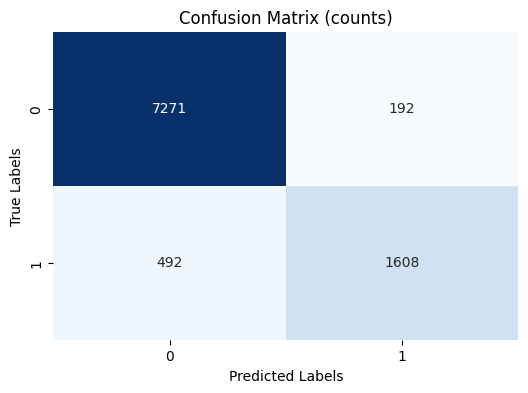

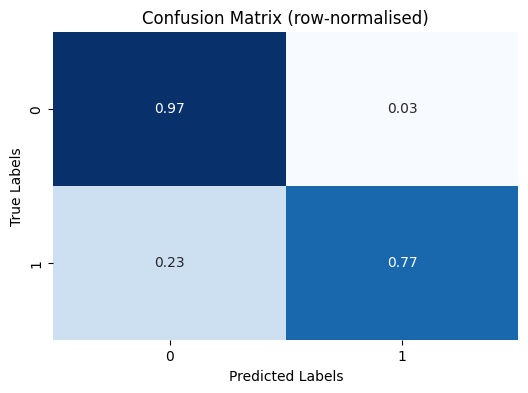

In [195]:
# ----------------------------
# Confusion matrix (counts + row-normalised)
# ----------------------------
def plot_confusion_matrix(cm, fmt='g', title='Confusion Matrix'):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt=fmt, cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

cm = confusion_matrix(y_val, preds)
plot_confusion_matrix(cm, fmt='g', title='Confusion Matrix (counts)')

cm_freq = np.divide(cm.astype(float), cm.sum(axis=1, keepdims=True), where=cm.sum(axis=1, keepdims=True)!=0)
cm_freq = np.round(cm_freq, 2)
plot_confusion_matrix(cm_freq, fmt='.2f', title='Confusion Matrix (row-normalised)')


In [196]:
# ----------------------------
# Precision / Recall / F1 (threshold=0.5)
# ----------------------------
print("Recall    :", recall_score(y_val, preds, zero_division=0))
print("Precision :", precision_score(y_val, preds, zero_division=0))
print("F1        :", f1_score(y_val, preds, zero_division=0))


Recall    : 0.7657142857142857
Precision : 0.8933333333333333
F1        : 0.8246153846153846


,recall,precision,f1
decision_threshold,,,
0.10,0.982381,0.542895,0.699322
0.15,0.962381,0.600416,0.739480
0.20,0.936667,0.659182,0.773800
0.25,0.908095,0.706558,0.794749
0.30,0.881429,0.750000,0.810420
0.35,0.851905,0.790194,0.819890
0.40,0.823810,0.826960,0.825382
0.45,0.795714,0.860453,0.826818
0.50,0.765714,0.893333,0.824615


<Figure size 700x400 with 0 Axes>

<Axes: xlabel='decision_threshold'>

Text(0.5, 1.0, 'Precision / Recall / F1 vs decision threshold')

Text(0.5, 0, 'Decision threshold')

Text(0, 0.5, 'Score')

<Figure size 700x400 with 0 Axes>

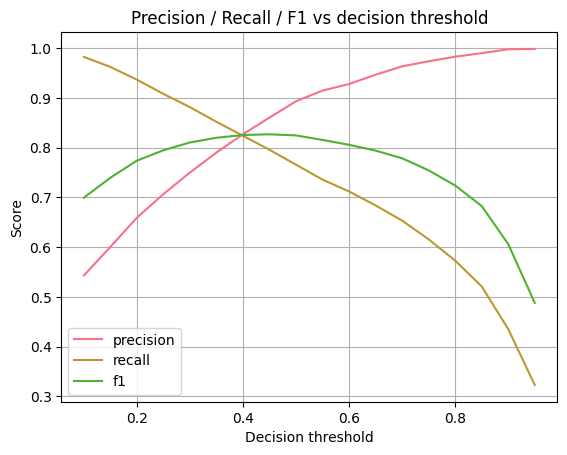

In [197]:
# ----------------------------
# Threshold analysis
# ----------------------------
probas = clf.predict_proba(X_val)[:, 1]
ths = np.arange(0.10, 1.00, step=0.05)

results = []
for decision_threshold in ths:
    th_preds = (probas > decision_threshold).astype(int)
    results.append({
        "decision_threshold": decision_threshold,
        "recall": recall_score(y_val, th_preds, zero_division=0),
        "precision": precision_score(y_val, th_preds, zero_division=0),
        "f1": f1_score(y_val, th_preds, zero_division=0),
    })

results = pd.DataFrame(results).set_index('decision_threshold')
display(results)

plt.figure(figsize=(7,4))
results[['precision','recall','f1']].plot()
plt.title("Precision / Recall / F1 vs decision threshold")
plt.xlabel("Decision threshold")
plt.ylabel("Score")
plt.grid(True)
plt.show()


<Figure size 600x400 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC curve')

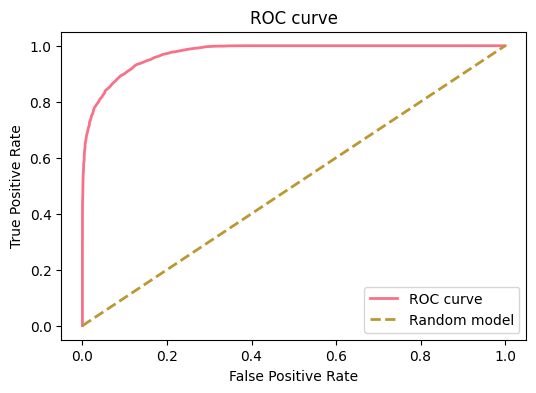

ROC AUC: 0.9730797011287431


In [198]:
# ----------------------------
# ROC curve + AUC
# ----------------------------
fpr, tpr, roc_thresholds = roc_curve(y_val, probas)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--', label='Random model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

print("ROC AUC:", roc_auc_score(y_val, probas))

<Figure size 600x400 with 0 Axes>

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision-Recall curve')

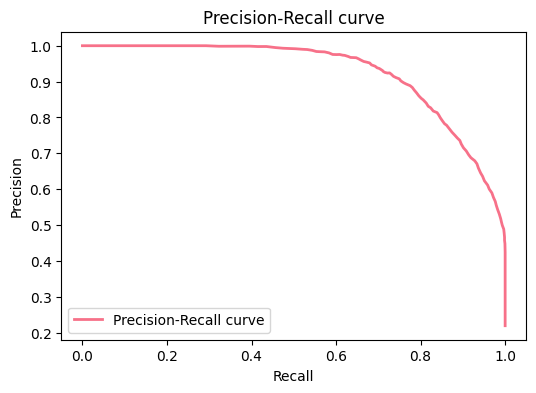

Average Precision: 0.924130580970101


In [199]:
# ----------------------------
# Precision-Recall curve + Average Precision
# ----------------------------
precisions, recalls, pr_thresholds = precision_recall_curve(y_val, probas)

plt.figure(figsize=(6,4))
plt.plot(recalls, precisions, lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

print("Average Precision:", average_precision_score(y_val, probas))

In [200]:
# Random Forest parameters
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
}

# Print parameter grid sizes
param_grids = {
    'Random Forest': rf_param_grid
}

for model_name, param_grid in param_grids.items():
    total_combinations = 1
    for values in param_grid.values():
        total_combinations *= len(values)
    print(f"{model_name}: {total_combinations} parameter combinations")

Random Forest: 432 parameter combinations


In [201]:
# TODO: Setup models and data for grid search
# Note: Some models work better with scaled data, others with original data
models = {
    'Random Forest': (RandomForestClassifier(random_state=42), rf_param_grid, X_train_encoded)
}

# Store results
grid_search_results = {}

# TODO: Set your chosen metric from the previous section
scoring_metric = 'f1'

print(f"Starting Grid Search for all models using '{scoring_metric}' metric...")
print("This might take a few minutes...\n")

Starting Grid Search for all models using 'f1' metric...
This might take a few minutes...



In [ ]:
# TODO: Grid Search for Random Forest (your final implementation)
print("🚀 YOUR TURN: Grid Search for Random Forest")
print("This is your last one - you've got this! 💪")

# TODO: Complete the Random Forest grid search
# Remember: Random Forest also uses X_train_encoded (not scaled data)
rf_model, rf_grid, rf_data = models['Random Forest']

# YOUR CODE HERE - implement grid search for Random Forest
rf_grid_search = GridSearchCV(
    estimator = rf_model,
    param_grid = rf_grid,
    cv = 2,
    scoring=scoring_metric,
    n_jobs = -1,
    verbose=1
)
# YOUR CODE HERE - fit the grid search
rf_grid_search.fit(rf_data, y_train)
grid_search_results['Random Forest'] = rf_grid_search
print(f"✅ Best params: {rf_grid_search.best_params_}")
print(f"✅ Best CV {scoring_metric}: {rf_grid_search.best_score_:.4f}\n")

print("🎉 Grid Search completed for all models!")
print("Great job implementing all the grid searches! 🎊")

🚀 YOUR TURN: Grid Search for Random Forest
This is your last one - you've got this! 💪
Fitting 2 folds for each of 432 candidates, totalling 864 fits


In [ ]:
# 1) aplicar as MESMAS drops do treino
test_X = test.drop(columns=['person_gender', 'id'])

# 2) usar o MESMO encoder já "fitado" no treino
test_X_encoded = ohe.transform(test_X)

# 3) prever
y_pred_test = rf_baseline.predict(test_X_encoded)

# sanity check (para veres se continua tudo a zeros)
pd.Series(y_pred_test).value_counts()

submission = pd.DataFrame({
    "id": test["id"],
    "pred": y_pred_test
})
submission.head()
proba_test = rf_baseline.predict_proba(test_X_encoded)[:, 1]

In [ ]:
# Copiar score e label do modelo
X_train_encoded['score'] = X_train_encoded['credit_score']
X_train_encoded['label_value'] = X_train_encoded['previous_loan_defaults_on_file_2']

# Criar grupos etários
X_train_encoded['age_group'] = pd.cut(
    X_train_encoded['person_age'],
    bins=[17, 25, 35, 50, 100],
    labels=['18-25', '26-35', '36-50', '50+']
)

# Garantir que age_group é string
X_train_encoded['age_group'] = X_train_encoded['age_group'].astype(str)

# Selecionar colunas obrigatórias para Aequitas e remover NaN
cols = ['score', 'label_value', 'age_group']
df_aeq = X_train_encoded[cols].dropna()

df_aeq.head()

In [ ]:
from aequitas.group import Group

g = Group()
xtab, _ = g.get_crosstabs(df_aeq, attr_cols=['age_group'])

xtab.head()

In [ ]:
from aequitas.bias import Bias

b = Bias()
bdf = b.get_disparity_predefined_groups(
    xtab,
    original_df=df_aeq,
    ref_groups_dict={'age_group': '26-35'}
)

# Lista todas as colunas de disparidade
disparity_cols = [col for col in bdf.columns if '_disparity' in col]

# Mostrar as disparidades de todos os grupos
bdf[['attribute_name', 'attribute_value'] + disparity_cols].head(10)

In [ ]:
# Reconstruir educação a partir das colunas one-hot
X_train_encoded['education'] = (
    X_train_encoded[
        ['person_education_1','person_education_2',
         'person_education_3','person_education_4','person_education_5']
    ]
    .idxmax(axis=1)
    .astype(str)
)

X_train_encoded[['person_education_1','person_education_2','person_education_3',
                 'person_education_4','person_education_5','education']].head()

In [ ]:
xtab_edu, _ = g.get_crosstabs(X_train_encoded, attr_cols=['education'])
xtab_edu.head()

In [ ]:
submission.to_csv('Madagáscar.csv', index=False)

In [ ]:
d = pd.read_csv('Madagáscar.csv')

In [ ]:
d.head()